In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

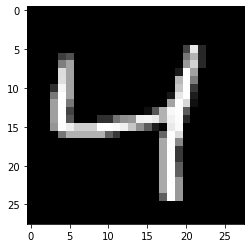

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2], cmap='gray')

In [8]:
y_train[2]

4

In [9]:
# 1  for black and white image
# 3 for color image

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [10]:
print(f"The shape after rehsape are {X_train.shape} {X_test.shape}")

The shape after rehsape are (60000, 28, 28, 1) (10000, 28, 28, 1)


In [11]:
#Scaling the image

X_train = X_train/255
X_test = X_test/255

#### Model Creation and Training

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(32,
                 kernel_size = 3,
                 activation ='relu',
                 input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu')) #Fully Connected
model.add(Dense(10, activation='softmax')) #output layer

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                346176    
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
________________________________________________

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [27]:
model.fit(X_train,
          y_train,
          validation_data=(X_test, y_test),
          epochs=3)

Epoch 1/3
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1665 - accuracy: 0.9507 - val_loss: 0.0655 - val_accuracy: 0.9797
Epoch 2/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0562 - accuracy: 0.9827 - val_loss: 0.0469 - val_accuracy: 0.9850
Epoch 3/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0377 - accuracy: 0.9887 - val_loss: 0.0511 - val_accuracy: 0.9835


In [30]:
import numpy as np

y_pred_train = np.argmax(model.predict(X_train), axis=1)
y_pred_test = np.argmax(model.predict(X_test), axis=1)

In [36]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_pred = y_pred_test, y_true=y_test))

Confusion Matrix
[[ 977    0    0    1    0    1    1    0    0    0]
 [   0 1126    1    3    0    1    2    1    1    0]
 [   2    2 1011   12    0    0    0    4    1    0]
 [   0    0    0 1006    0    2    0    0    2    0]
 [   1    1    0    1  961    0    1    0    1   16]
 [   1    0    0    8    0  881    1    0    0    1]
 [   7    2    0    1    2    9  934    0    3    0]
 [   1    1    4   13    0    0    0 1005    1    3]
 [   7    0    2   11    0    4    0    1  943    6]
 [   3    0    0    5    1    3    0    2    4  991]]
